In [21]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you are learning about langgraph?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right", name="Rahul"))
messages.append(AIMessage(content=f"Great, What would you like to learn about it.", name="Model"))
messages.append(HumanMessage(content=f"I would love to learn how its basic working works.", name="Rahul"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you are learning about langgraph?
================================ Human Message =================================
Name: Rahul

Yes, that's right
================================== Ai Message ==================================
Name: Model

Great, What would you like to learn about it.
================================ Human Message =================================
Name: Rahul

I would love to learn how its basic working works.


In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [7]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-2.5-32b")
result=llm.invoke(messages)
result

AIMessage(content='It seems there might be a slight confusion, as "langgraph" does not seem to be a widely recognized term or technology based on the current information available. It\'s possible that you might be referring to a specific project, tool, or concept that is either very new or specific to a certain field or community.\n\nIf you could provide more context or detail about what "langgraph" refers to, I would be more than happy to help you understand how it works and its applications. Could you clarify or provide more details about the context in which you encountered the term "langgraph"?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 118, 'prompt_tokens': 86, 'total_tokens': 204, 'completion_time': 0.298079775, 'prompt_time': 0.006455696, 'queue_time': 0.02439701, 'total_time': 0.304535471}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_7b9ecfcd5f', 'finish_reason': 'stop', 'logprobs': None}, id='run-5b3201a8-1d59-4303-ad42-2b220343

In [53]:
def add(a:int,b:int)->int:
    """
    add a to b
    """
    return a+b

In [9]:
llm_with_tools=llm.bind_tools([add])

In [22]:
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 3", name="Rahul")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_p5h4', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 173, 'total_tokens': 198, 'completion_time': 0.062844284, 'prompt_time': 0.010378342, 'queue_time': 0.022053041000000002, 'total_time': 0.073222626}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_7b9ecfcd5f', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-abf160b8-0272-4065-9e92-7bbcfb817833-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'call_p5h4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 173, 'output_tokens': 25, 'total_tokens': 198})

In [19]:
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 3},
  'id': 'call_7k3v',
  'type': 'tool_call'}]

In [20]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MesssageState(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [23]:
initial_message=[
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I'm looking for information about India's got latent", name="Rahul")
]
## New message to add
new_messaage= AIMessage(content="Sure, I can help you with that. What specifically are you interested in?", name="Model")

add_messages(initial_message, new_messaage)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1065cf0e-428f-40e0-9cfb-5f1faa96793b'),
 HumanMessage(content="I'm looking for information about India's got latent", additional_kwargs={}, response_metadata={}, name='Rahul', id='5c1e4715-06f1-4d6f-a040-ee43081ad1fa'),
 AIMessage(content='Sure, I can help you with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='06d51a42-234b-4137-beea-fbc44c63f48c')]

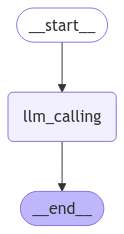

In [25]:
from IPython.display import display, Image
from langgraph.graph import StateGraph,START,END

def tool_llm_calling(state:MesssageState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

## BUild graph
builder=StateGraph(MesssageState)
builder.add_node("llm_calling",tool_llm_calling)
builder.add_edge(START,"llm_calling")
builder.add_edge("llm_calling",END)
graph=builder.compile()

## Display
display(Image(graph.get_graph().draw_mermaid_png()))

In [26]:
messages=graph.invoke({"messages":HumanMessage(content="Hello,my name is Rahul")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello,my name is Rahul
================================== Ai Message ==================================

Hello Rahul! It's nice to meet you. How can I assist you today?


In [27]:
messages=graph.invoke({"messages":HumanMessage(content="What is 2 plus 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is 2 plus 3
================================== Ai Message ==================================
Tool Calls:
  add (call_rt4a)
 Call ID: call_rt4a
  Args:
    a: 2
    b: 3


In [28]:
def multiply(a:int,b:int)->int:
    """
    Multiply a to b
    """
    return a*b

In [60]:
llm_with_tools=llm.bind_tools([multiply,add])

In [61]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState

def tool_llm_calling(state:MesssageState):
    return {"messages":[llm_with_tools.invoke(state['messages'])]}

In [62]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

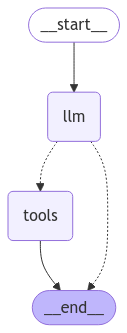

In [63]:
## Graph
builder1=StateGraph(MessagesState)
builder1.add_node("llm",tool_llm_calling)
builder1.add_node("tools",ToolNode([multiply,add]))
builder1.add_edge(START,"llm")
builder1.add_conditional_edges(
    "llm",
    ## If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    ## IF the latest message (result) from assistant is not a tool call -> tools_condition routes to END
    tools_condition,
)
builder1.add_edge("tools",END)
tool_graph=builder1.compile()

## display
display(Image(tool_graph.get_graph().draw_mermaid_png()))

In [64]:
messages=tool_graph.invoke({"messages":HumanMessage(content="what is 2*3 and then add 4 to 5?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is 2*3 and then add 4 to 5?
================================== Ai Message ==================================
Tool Calls:
  multiply (call_2zqh)
 Call ID: call_2zqh
  Args:
    a: 2
    b: 3
  add (call_vpnb)
 Call ID: call_vpnb
  Args:
    a: 4
    b: 5
================================= Tool Message =================================
Name: multiply

6
================================= Tool Message =================================
Name: add

9


In [57]:
messages=tool_graph.invoke({"messages":HumanMessage(content="Who is Samay raina?")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Who is Samay raina?
================================== Ai Message ==================================

Samay Raina is a name that might refer to a specific individual, but without more context, it's difficult to provide accurate information. There isn't widely known public figure with this name. Could you provide more details about the Samay Raina you're asking about, such as their field of work, nationality, or any other identifying information?
